# Preprocesado

## Requisitos

In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install pycm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve
from pycm import ConfusionMatrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.8/599.8 kB 12.3 MB/s eta 0:00:00


## Carga del dataset


In [ ]:
full_df = pd.read_csv("./data.csv")
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20302 entries, 0 to 20301
Data columns (total 19 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Address                                              20302 non-null  object 
 1   Flag                                                 20302 non-null  int64  
 2   Avg_min_between_received_tnx                         20302 non-null  float64
 3   Avg_min_between_sent_tnx                             20302 non-null  float64
 4   Sent_tnx                                             20302 non-null  int64  
 5   Received_Tnx                                         20302 non-null  int64  
 6   Number_of_Created_Contracts                          20302 non-null  int64  
 7   Average_of_Unique_Received_From_Addresses            20302 non-null  int64  
 8   Average_of_Unique_Sent_To_Addresses                  20302 non-nul

In [ ]:
full_df.head()

,Address,Flag,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,0x000000000532b45f47779fce440748893b257865,1,7.973236e+07,11971.000000,3,20,0,20,3,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158,23,117.129473,117.132025,0.002551
1,0x00000000072d54638c2c2a3da3f715360269eea1,1,5.434648e+07,1281.695652,23,30,0,28,17,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806,53,215.965533,215.193910,-0.771623
2,0x0000000009324b6434d7766af41908e4c49ee1d7,1,1.771695e+08,4494.500000,6,9,0,9,3,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174,15,164.209043,164.214902,0.005859
3,0x0000000086c5d614bec59dfd2c9b88f7cb57f23c,1,3.213748e+08,0.000000,1,5,0,5,1,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305,6,60.502305,50.502914,-9.999391
4,0x00000000bf02300fd6251627aa3db8933a0eee83,1,7.971622e+07,12812.750000,4,20,0,17,2,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253,24,101.761014,81.766424,-19.994590


## Algunas gráficas interesantes

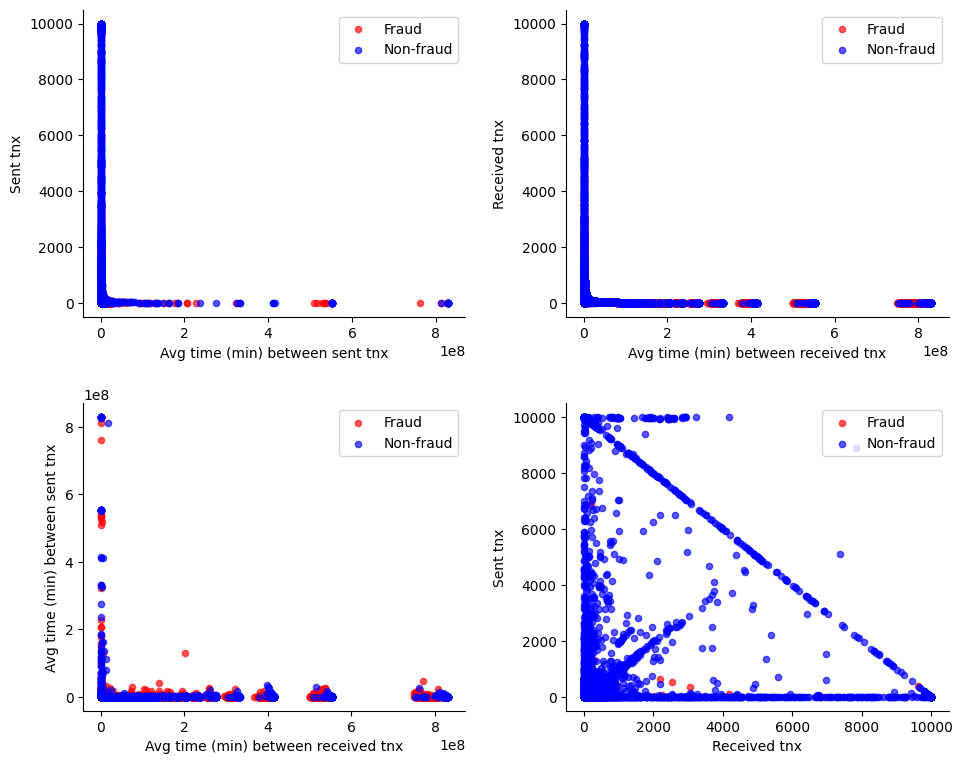

In [ ]:
frauds_df = full_df[full_df['Flag'] == 1]
non_frauds_df = full_df[full_df['Flag'] == 0]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

frauds_df.plot(kind='scatter', x='Avg_min_between_sent_tnx', y='Sent_tnx', label='Fraud', color='red', s=20, alpha=.65, ax=axs[0,0])
non_frauds_df.plot(kind='scatter', x='Avg_min_between_sent_tnx', y='Sent_tnx', label='Non-fraud', color='blue', s=20, alpha=.65, ax=axs[0,0])
axs[0,0].set_xlabel('Avg time (min) between sent tnx')
axs[0,0].set_ylabel('Sent tnx')
axs[0,0].spines[['top', 'right',]].set_visible(False)
axs[0,0].legend()

frauds_df.plot(kind='scatter', x='Avg_min_between_received_tnx', y='Received_Tnx', label='Fraud', color='red', s=20, alpha=.65, ax=axs[0,1])
non_frauds_df.plot(kind='scatter', x='Avg_min_between_received_tnx', y='Received_Tnx', label='Non-fraud', color='blue', s=20, alpha=.65, ax=axs[0,1])
axs[0,1].set_xlabel('Avg time (min) between received tnx')
axs[0,1].set_ylabel('Received tnx')
axs[0,1].spines[['top', 'right',]].set_visible(False)
axs[0,1].legend()

frauds_df.plot(kind='scatter', x='Avg_min_between_received_tnx', y='Avg_min_between_sent_tnx', label='Fraud', color='red', s=20, alpha=.65, ax=axs[1,0])
non_frauds_df.plot(kind='scatter', x='Avg_min_between_received_tnx', y='Avg_min_between_sent_tnx', label='Non-fraud', color='blue', s=20, alpha=.65, ax=axs[1,0])
axs[1,0].set_xlabel('Avg time (min) between received tnx')
axs[1,0].set_ylabel('Avg time (min) between sent tnx')
axs[1,0].spines[['top', 'right',]].set_visible(False)
axs[1,0].legend()

frauds_df.plot(kind='scatter', x='Received_Tnx', y='Sent_tnx', label='Fraud', color='red', s=20, alpha=.65, ax=axs[1,1])
non_frauds_df.plot(kind='scatter', x='Received_Tnx', y='Sent_tnx', label='Non-fraud', color='blue', s=20, alpha=.65, ax=axs[1,1])
axs[1,1].set_xlabel('Received tnx')
axs[1,1].set_ylabel('Sent tnx')
axs[1,1].spines[['top', 'right',]].set_visible(False)
axs[1,1].legend()

plt.tight_layout(pad=2.0)
plt.show()




## Generar dataset no etiquetado

In [ ]:
unlabeled_df = full_df.drop(columns=['Flag', 'Address']).copy()
unlabeled_df.head()

,Avg_min_between_received_tnx,Avg_min_between_sent_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Average_of_Unique_Received_From_Addresses,Average_of_Unique_Sent_To_Addresses,min_value_received,max_value_received,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance
0,7.973236e+07,11971.000000,3,20,0,20,3,0.000410,14.331000,5.856601,39.041473,39.044000,39.043158,23,117.129473,117.132025,0.002551
1,5.434648e+07,1281.695652,23,30,0,28,17,0.004312,208.090009,7.173130,0.000000,82.000000,9.389806,53,215.965533,215.193910,-0.771623
2,1.771695e+08,4494.500000,6,9,0,9,3,0.010000,100.000000,18.246100,15.194834,39.540900,27.368174,15,164.209043,164.214902,0.005859
3,3.213748e+08,0.000000,1,5,0,5,1,5.000000,24.178631,10.100583,60.502305,60.502305,60.502305,6,60.502305,50.502914,-9.999391
4,7.971622e+07,12812.750000,4,20,0,17,2,0.002290,21.000000,4.088321,13.182630,41.477000,25.440253,24,101.761014,81.766424,-19.994590


## Normalizo los datos y aplico PCA

Varianza explicativa acumulada con 10 componentes: 0.9067284649711961


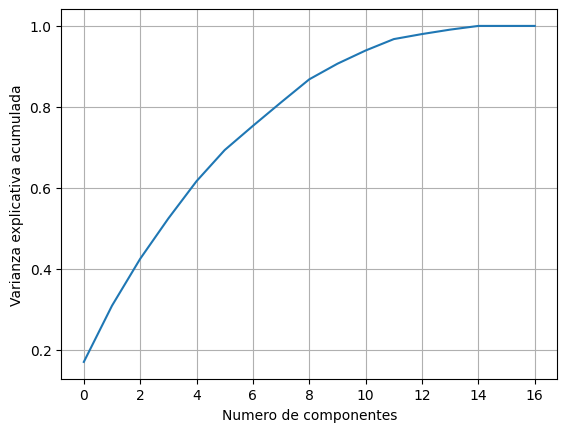

In [ ]:
scaler = StandardScaler()
scaler.fit(unlabeled_df)
df_normalized = scaler.transform(unlabeled_df)
pca = PCA(n_components=17)
pca.fit(df_normalized)
df_pca = pca.transform(df_normalized)

expl = pca.explained_variance_ratio_
plt.plot(np.cumsum(expl))
plt.xlabel('Numero de componentes')
plt.ylabel('Varianza explicativa acumulada')
plt.grid()

n_comps = 10
print(f'Varianza explicativa acumulada con {n_comps} componentes: {sum(expl[0:n_comps])}')

plt.show()

In [ ]:
X = pd.DataFrame(df_pca[:,:n_comps])

# Local Outlier Factor

Mejor precisión: 0.6817062358388336 con 16 vecinos


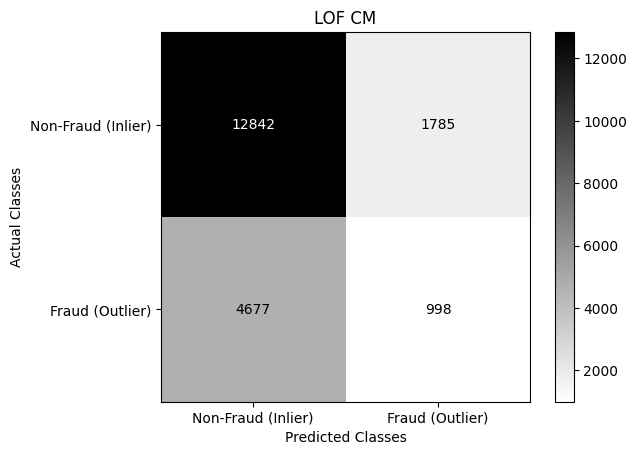

In [ ]:
# @title Encontrar mejor parámetro K

accs = dict()
cms = dict()
test_flags = np.array(full_df['Flag'])

for k in range(2, 30):
    clf = LocalOutlierFactor(n_neighbors=k)
    predicted_flags = clf.fit_predict(X)
    predicted_flags = np.where(predicted_flags == -1, 1,
                               np.where(predicted_flags == 1, 0, predicted_flags))
    cm = ConfusionMatrix(actual_vector=test_flags, predict_vector=predicted_flags)
    cms[k] = cm
    accs[k] = cm.Overall_ACC

best_k, best_acc = max(accs.items(), key=lambda x: x[1])
print("Mejor precisión: {} con {} vecinos".format(best_acc, best_k))
best_cm = cms[best_k]

best_cm.relabel({0: "Non-Fraud (Inlier)", 1: "Fraud (Outlier)"})
best_cm.plot(title="LOF CM", number_label=True)
plt.show()


Mejor precisión: 0.6849078908481923 eliminando 4 componentes


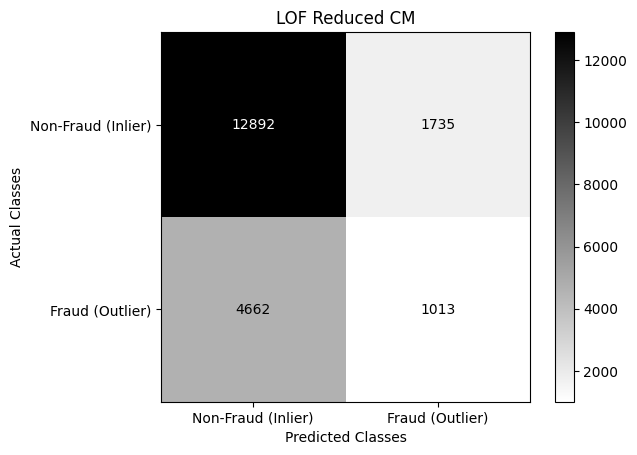

In [ ]:
# @title Eliminar componentes para optimizar precision (partiendo del dataset original normalizado, sin PCA)

X = pd.DataFrame(df_normalized)

def reduce_one_component(df):
    n_cols = df.shape[1]
    reduced_accs = dict()
    reduced_cms = dict()
    for i in range(n_cols):
        new_X = df.iloc[:, df.columns != df.columns[i]]
        clf = LocalOutlierFactor(n_neighbors=best_k)
        predicted_flags = clf.fit_predict(new_X)
        predicted_flags = np.where(predicted_flags == -1, 1,
                                np.where(predicted_flags == 1, 0, predicted_flags))
        cm = ConfusionMatrix(actual_vector=test_flags, predict_vector=predicted_flags)
        reduced_cms[i] = cm
        reduced_accs[i] = cm.Overall_ACC
    best_i, best_reduced_acc = max(reduced_accs.items(), key=lambda x: x[1])
    best_reduced_cm = reduced_cms[best_i]
    return best_i, best_reduced_cm, new_X

n_max = 5 # Numero maximo de componentes a eliminar
reduced_X = X
for j in range(n_max+1):
    _, cm, reduced_X = reduce_one_component(reduced_X)
    acc = cm.Overall_ACC
    if (acc > best_acc):
        best_acc = acc
        best_cm = cm
    else:
        break

print("Mejor precisión: {} eliminando {} componentes".format(best_acc, j))
best_cm.relabel({0: "Non-Fraud (Inlier)", 1: "Fraud (Outlier)"})
best_cm.plot(title="LOF Reduced CM", number_label=True)
plt.show()

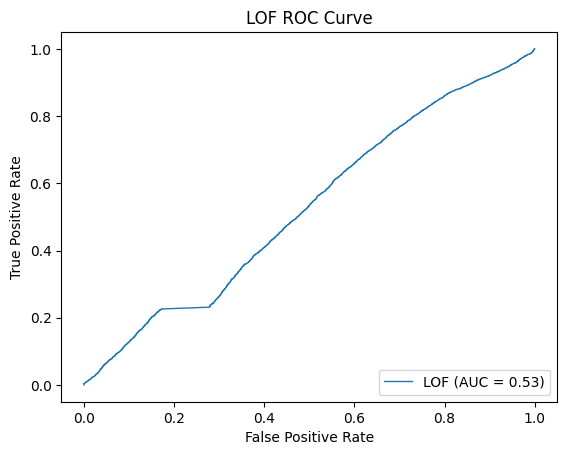

In [ ]:
# @title Curva ROC

from sklearn.metrics import RocCurveDisplay

clf = LocalOutlierFactor(n_neighbors=best_k)
clf.fit(X)
Y = np.array(full_df['Flag'])
Y_pred = clf.negative_outlier_factor_

display = RocCurveDisplay.from_predictions(
    Y,
    Y_pred,
    pos_label=0,
    name='LOF',
    linewidth=1,
)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOF ROC Curve')
plt.show()

# Isolation forest

Best accuracy: 0.6380159590188159 with 800 estimators


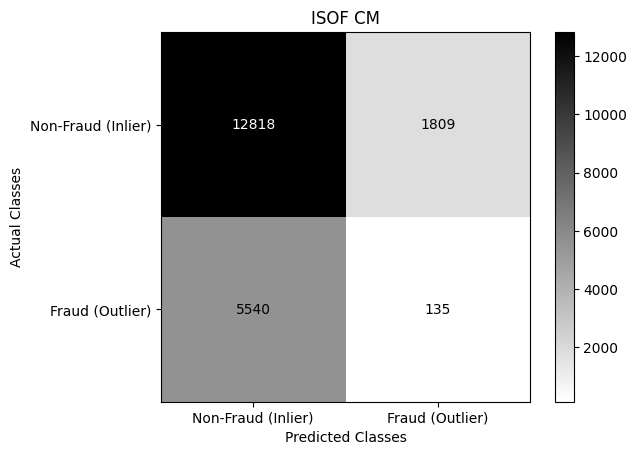

In [ ]:
accs = dict()
cms = dict()
test_flags = np.array(full_df['Flag'])
for n in [200, 400, 600, 800 , 1000]:
    isof = IsolationForest(
                n_estimators  = n,
                random_state  = 33,
    )
    predicted_flags = isof.fit_predict(X)
    predicted_flags = np.where(predicted_flags == -1, 1,
                               np.where(predicted_flags == 1, 0, predicted_flags))
    cm = ConfusionMatrix(actual_vector=test_flags, predict_vector=predicted_flags)
    cms[n] = cm
    accs[n] = cm.Overall_ACC

best_n, best_acc = max(accs.items(), key=lambda x: x[1])
print("Best accuracy: {} with {} estimators".format(best_acc, best_n))
best_cm = cms[best_n]
best_cm.relabel({0: "Non-Fraud (Inlier)", 1: "Fraud (Outlier)"})
best_cm.plot(title="ISOF CM", number_label=True)
plt.show()
